In [101]:
import os
from pathlib import Path

import torch
import torchaudio
import soundfile as sf
import sounddevice as sd
from scipy.io import wavfile

import matplotlib.pyplot as plt
import numpy as np

from scipy import signal
from scipy.fft import fftshift
import matplotlib.pyplot as plt
import matplotlib.cm as cm


In [102]:
from sc_wind_noise_generator import WindNoiseGenerator as wng


In [103]:
# Parameters
DURATION = 16 # Duration in seconds
FS = 16000 # Sample frequency in Hz
GUSTINESS = 8  # Number of speed points. One yields constant wind. High values yield gusty wind (more than 10 can sound unnatural).
# WIND_PROFILE_OUTDOOR = np.array([3.45, 6.74, 5.65, 6.34, 4.00,
#                                  5.88, 3.26, 3.19, 4.78, 4.16,
#                                  4.67, 4.69, 4.61, 6.53, 6.05]) # Wind speed data example

WIND_PROFILE_OUTDOOR = np.array([ 8.05 , 10.05 , 8.05 , 7.45, 9.32]) # Wind speed data example
WIND_PROFILE_OUTDOOR = np.array([ 9.05 , 8.55 , 9.05 , 8.45, 9.32]) # Wind speed data example
# WIND_PROFILE_OUTDOOR = np.array([ 3.05 , 3.55 , 4.05 , 3.45, 4.32]) # Wind speed data example
WIND_PROFILE_OUTDOOR = np.array([ 12.45 , 9.05 , 14.05 , 8.75 , 12.32]) # Wind speed data example
# WIND_PROFILE_OUTDOOR = np.array([ 11.05 , 12.05 , 11.05 , 13.45, 12.32]) # Wind speed data example

SEED = 4 # Seed for random sequence regeneration

# Generate wind noise
wn = wng(fs=FS, duration=DURATION, generate=False,
                wind_profile=WIND_PROFILE_OUTDOOR,
                gustiness=GUSTINESS,
                short_term_var=True, start_seed=SEED)


In [104]:
wn_signal, wind_profile = wn.generate_wind_noise()


In [105]:
# wn.play_signal(wn_signal)

In [106]:
key = "high_gustiness"

In [107]:
for i in range(10):
    src_audio_path = Path("/Users/erkan.bayram/data/ull_anc/ver1/train-clean-360/22/121140/22-121140-003"+str(i)+".FLAC")
    data, samplerate = sf.read(src_audio_path)  
    sf.write("/Users/erkan.bayram/Documents/data/reading_"  +  str(i)+ ".wav", data.T, samplerate)

    wn_signal, wind_profile = wn.generate_wind_noise()

    wn.save_signal(wn_signal, filename="/Users/erkan.bayram/Documents/data/wind_noise_" + key + "_"+ str(i)+".wav", num_ch=1, fs=16000)

    samplerate_wind, data_wind = wavfile.read("/Users/erkan.bayram/Documents/data/wind_noise_" +  key + "_"+ str(i)+".wav")
    samplerate_speech, data_speech_wav = wavfile.read("/Users/erkan.bayram/Documents/data/reading_" +  str(i)+ ".wav")

    # data_trunct = data_wind[0:len(data)]
    # data_trunct = (data_trunct) / (np.max(data_trunct))


    noisy = data_wind[0:len(data)] + data_speech_wav 
    sf.write("/Users/erkan.bayram/Documents/data/noisy" +  key + "_"+ str(i)+ ".wav", noisy.T, samplerate)


    fs = 16000

    # N = 10000
    # time = np.arange(N) / float(fs)

    # f, t, Sxx = signal.spectrogram(noisy, fs, nperseg = 512 ,nfft = 1024)
    # dummy =  (Sxx - np.min( Sxx ) ) / ( np.max(Sxx) - np.min(Sxx) )

    # plt.pcolormesh(t, f, dummy,    shading='gouraud' )
    # plt.ylabel('Frequency [Hz]')
    # plt.xlabel('Time [sec]')


    # plt.show()



    # f, t, Sxx = signal.spectrogram(data_speech_wav[:N], fs, nperseg = 512 ,nfft = 1024)
    # dummy =  (Sxx - np.min( Sxx ) ) / ( np.max(Sxx) - np.min(Sxx) )

    # plt.pcolormesh(t, f, dummy,  cmap=cm.gray ,  shading='gouraud' )
    # plt.ylabel('Frequency [Hz]')
    # plt.xlabel('Time [sec]')
    # plt.title('speech')
    # plt.show()


    # f, t, Sxx = signal.spectrogram(data_wind[:N] , fs, nperseg = 512 ,nfft = 1024)
    # dummy =  (Sxx - np.min( Sxx ) ) / ( np.max(Sxx) - np.min(Sxx) )

    # plt.pcolormesh(t, f, dummy,  cmap=cm.gray   ,shading='gouraud' )
    # plt.ylabel('Frequency [Hz]')
    # plt.xlabel('Time [sec]')
    # plt.show()
        


    

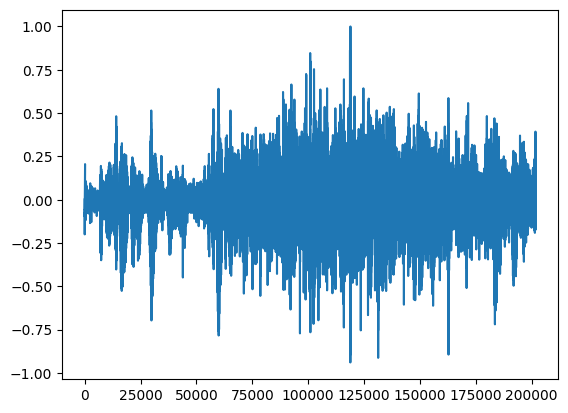

In [58]:
plt.plot( noisy / np.max( noisy ))


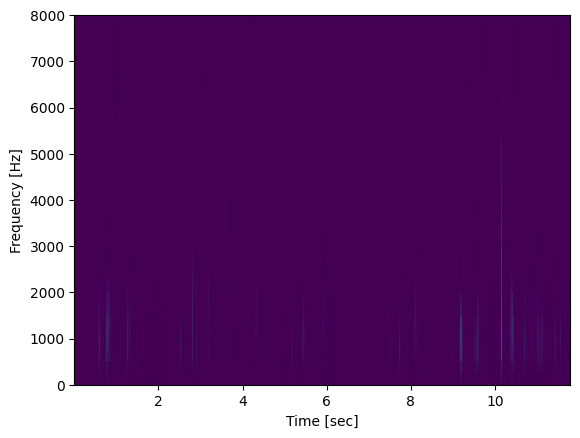

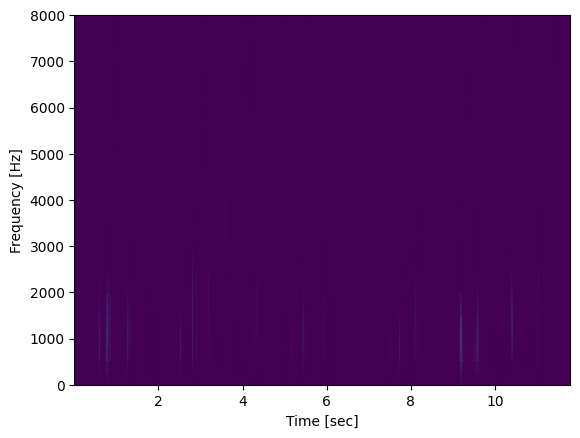

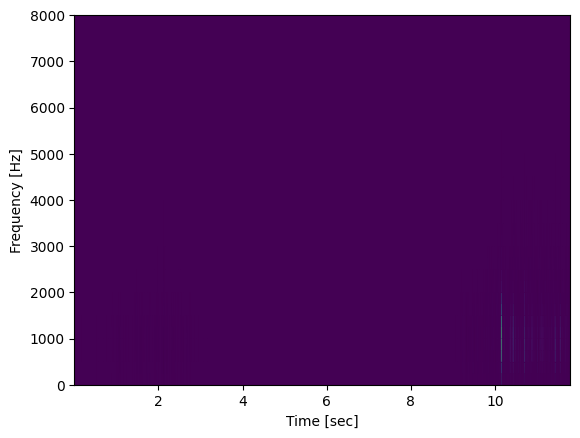

In [43]:
fs = 16000

time = np.arange(len(noisy)) / float(fs)

f, t, Sxx = signal.spectrogram(noisy, fs, nperseg = 16 ,nfft = 32)
dummy =  (Sxx - np.min( Sxx ) ) / ( np.max(Sxx) - np.min(Sxx) )

plt.pcolormesh(t, f, dummy,    shading='gouraud' )
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.show()



f, t, Sxx = signal.spectrogram(data_speech_wav, fs, nperseg = 16 ,nfft = 32)
dummy =  (Sxx - np.min( Sxx ) ) / ( np.max(Sxx) - np.min(Sxx) )

plt.pcolormesh(t, f, dummy,    shading='gouraud' )
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.show()


f, t, Sxx = signal.spectrogram(data_wind[0:len(data)] , fs, nperseg = 16 ,nfft = 34)
dummy =  (Sxx - np.min( Sxx ) ) / ( np.max(Sxx) - np.min(Sxx) )

plt.pcolormesh(t, f, dummy,    shading='gouraud' )
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.show()



In [32]:
dummy =  (Sxx - np.min( Sxx ) ) / ( np.max(Sxx) - np.min(Sxx) )

In [34]:
dummy.shape

(129, 842)

TypeError: Dimensions of C (129, 842) are incompatible with X (188720) and/or Y (129); see help(pcolormesh)

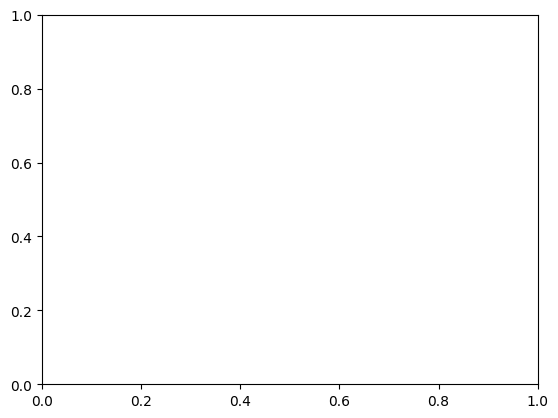

In [36]:
fs = 16000

time = np.arange(len(noisy)) / float(fs)

plt.pcolormesh(time, f, dummy,    shading='gouraud' )
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.show()


In [8]:


src_audio_path = Path('/Users/erkan.bayram/data/ull_anc/ver1/train-clean-360/22/121140/22-121140-0004.FLAC')

In [13]:
data, samplerate = sf.read(src_audio_path)  


In [14]:
sf.write('./reading_11.wav', data.T, samplerate)


In [15]:
# sd.play( data , samplerate)


In [16]:
samplerate_wind, data_wind = wavfile.read('./wind_noise_12.wav')


In [28]:
samplerate_speech, data_speech_wav = wavfile.read('./reading_11.wav')


In [29]:
sd.play( data_wind , samplerate_wind)

In [30]:
sd.play( data_speech_wav , samplerate_speech)

In [34]:
sd.play( data_wind , samplerate_wind)

In [18]:
data_trunct = data_wind[0:len(data)]
data_trunct = (data_trunct) / (2*np.max(data_trunct))  

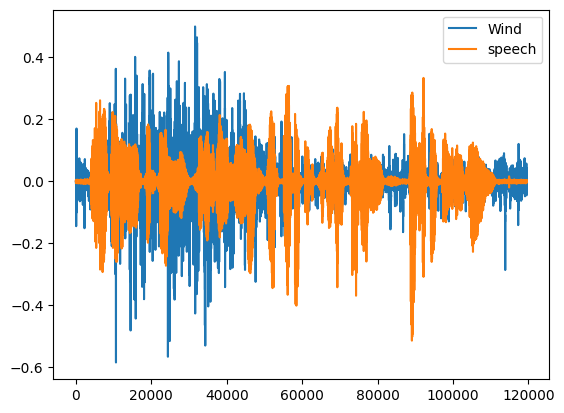

In [19]:
plt.plot( data_trunct  , label = 'Wind' )
plt.plot( data  , label = "speech")
plt.legend()

In [22]:
sd.play( data  , samplerate)

In [26]:
sd.play( data_trunct  , samplerate)

In [37]:
sd.play( data + data_trunct , samplerate)

In [38]:
sd.play(  data_wind[0:len(data)] + data_speech_wav , samplerate)